In [1]:
import scipy.io
import numpy as np
from torchAA import torchAA
import matplotlib.pyplot as plt
from sklearn import metrics



torchAA.py


In [7]:
import sys

sys.path.append('../..')

# from torchNMF import NMF
from helpers.callbacks import explained_variance, ChangeStopper, EarlyStop

from helpers.callbacks import EarlyStop

In [9]:
# load data from .MAT file
mat = scipy.io.loadmat('../../helpers/data/NMR_mix_DoE.mat')

# Get X and Labels. Probably different for the other dataset, but i didn't check :)
X = mat.get('xData')
targets = mat.get('yData')
target_labels = mat.get('yLabels')
axis = mat.get("Axis")



Components: 1
Components: 2s: 53819871990201.616
Components: 3oss: 13682639912401.219
Components: 4oss: 13671093077324.342


In [13]:
X.shape

(231, 14000)

In [17]:

# Fit NMF and AA 10 times and get an average loss curve for each as well as an average explained variance
max_components = 4
aa_explained = []
nmf_explained = []
for i in range(max_components):
    print(F"Components: {i+1}", end="\n")
    # nmf = NMF(X, i+1)
    aa = torchAA(X.T, i+1)
    # nmf.fit(verbose=True, stopper=EarlyStop())
    aa.fit(verbose=True, stopper=EarlyStop(patience=25))
    # nmf_explained.append(explained_variance(X, nmf.forward().detach().numpy()))
    aa_explained.append(explained_variance(X.T, aa.forward().detach().numpy()))

Components: 1
Components: 2ss: 9638890663686.982
Components: 3oss: 5621378450278.9135
Components: 4oss: 818805808182.1685


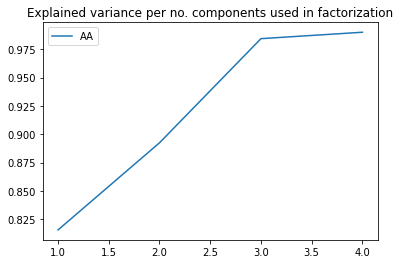

In [19]:

plt.figure()
# plt.plot(np.arange(1, max_components+1), nmf_explained, label="NMF")
plt.plot(np.arange(1, max_components+1), aa_explained, label="AA")
plt.title("Explained variance per no. components used in factorization")
plt.legend()
plt.show()

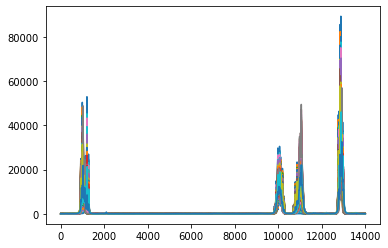

In [22]:
plt.plot(X.T)
plt.show()